In [1]:
from preprocess_text import preprocess_text
import numpy as np

In [2]:
import pandas as pd

def preprocess_and_save(input_file, output_file):
    # Function to preprocess text from input_file
    # Assuming preprocess_text() is defined elsewhere
    df = preprocess_text(input_file)
    
    # Save processed data to CSV
    df.to_csv(output_file, index=False)
    
    print(f"Lyrics have been saved to '{output_file}'")

# Example usage:
input_file = './Lyrical_Verses/Enumerated_GreenEggsAndHam.txt'
output_file = './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'

preprocess_and_save(input_file, output_file)


Lyrics have been saved to './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'


In [3]:
df = pd.read_csv('./Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv')
df

,Work Title,Subdivision Title,Line
0,green eggs and ham by doctor seuss,stanza 1,i am sam i am sam sam i am
1,green eggs and ham by doctor seuss,stanza 2,that samiam that samiam i do not like that samiam
2,green eggs and ham by doctor seuss,stanza 3,do would you like green eggs and ham
3,green eggs and ham by doctor seuss,stanza 4,i do not like themsamiam
4,green eggs and ham by doctor seuss,stanza 4,i do not like green eggs and ham
...,...,...,...
99,green eggs and ham by doctor seuss,stanza 30,and i will eat them with a mouse
100,green eggs and ham by doctor seuss,stanza 30,and i will eat them here and there
101,green eggs and ham by doctor seuss,stanza 30,say i will eat them anywhere
102,green eggs and ham by doctor seuss,stanza 30,i do so like green eggs and ham


## Word2vec


In [4]:
from gensim.models import Word2Vec
import numpy as np

# Prepare the data
sentences = [line.split() for line in df['Line']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Generate embeddings for each line
def get_line_embedding(line, model):
    words = line.split()
    embedding = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    return embedding

embeddings = np.array([get_line_embedding(line, word2vec_model) for line in df['Line']])


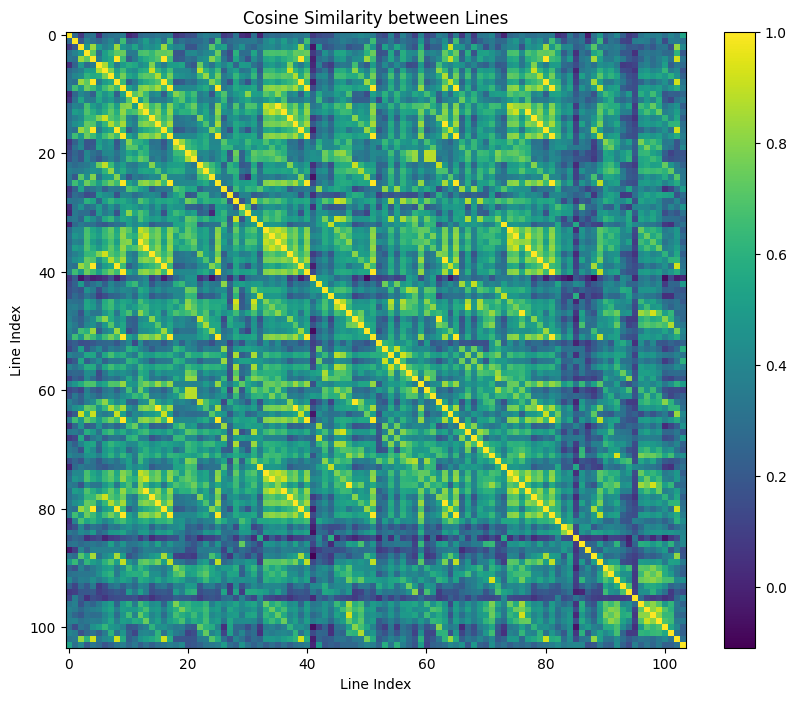

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings)

# Visualize similarity matrix
def visualize_similarity(cosine_sim):
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(cosine_sim)


## Glove

In [6]:
from gensim.models import KeyedVectors

# Replace 'glove-wiki-gigaword-100' with the specific model you need (e.g., 50, 100, 200, 300)
glove_model = KeyedVectors.load_word2vec_format('glove-wiki-gigaword-100.txt', binary=False)

# Example usage
vector = glove_model['example']
print(vector)


FileNotFoundError: [Errno 2] No such file or directory: 'glove-wiki-gigaword-100.txt'

In [ ]:
from glove import Corpus, Glove

# Prepare the data
sentences = [line.split() for line in df['Line']]

# Create a corpus and train GloVe model
corpus = Corpus()
corpus.fit(sentences, window=5)
glove_model = Glove(no_components=100, learning_rate=0.05)
glove_model.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove_model.add_dictionary(corpus.dictionary)

# Generate embeddings for each line
def get_line_embedding(line, model, dictionary):
    words = line.split()
    embedding = np.mean([model.word_vectors[dictionary[word]] for word in words if word in dictionary], axis=0)
    return embedding

embeddings = np.array([get_line_embedding(line, glove_model, glove_model.dictionary) for line in df['Line']])


ModuleNotFoundError: No module named 'glove'

In [ ]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


Fractal Dimension: 0.8680447745256871


In [ ]:
from scipy.linalg import triu

print(triu)


ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\scipy\linalg\__init__.py)